In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv(r'C:\Users\Atif Ali Khan\Desktop\New folder\AXISBANK - AXISBANK.CSV',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,26.7,26.70,26.70,26.70,112100
2000-01-04,27.0,28.70,26.50,26.85,234500
2000-01-05,26.0,27.75,25.50,26.30,170100
2000-01-06,25.8,27.00,25.80,25.95,102100
2000-01-07,25.0,26.00,24.25,24.80,62600


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5306 non-null   float64
 1   High    5306 non-null   float64
 2   Low     5306 non-null   float64
 3   Close   5306 non-null   float64
 4   Volume  5306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.7 KB


<AxesSubplot:xlabel='Date'>

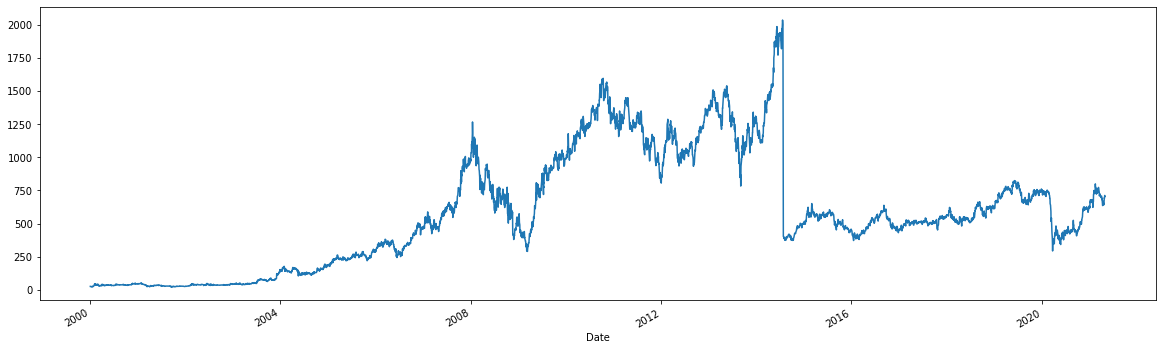

In [6]:
dataset['Open'].plot(figsize=(20,6))

In [7]:
dataset['Volume'] = dataset['Volume'].astype(float)

In [8]:
#7 Day Rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN
2000-01-11,25.685714,26.778571,25.250000,25.542857,119614.285714
2000-01-12,25.100000,26.464286,24.664286,25.157143,108242.857143
2000-01-13,24.742857,25.864286,24.178571,24.692857,81642.857143


<AxesSubplot:xlabel='Date'>

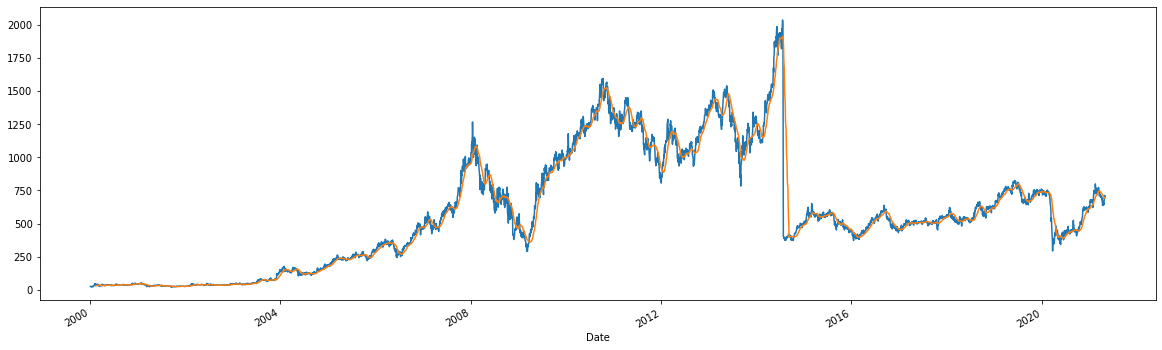

In [9]:
dataset['Open'].plot(figsize=(20,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

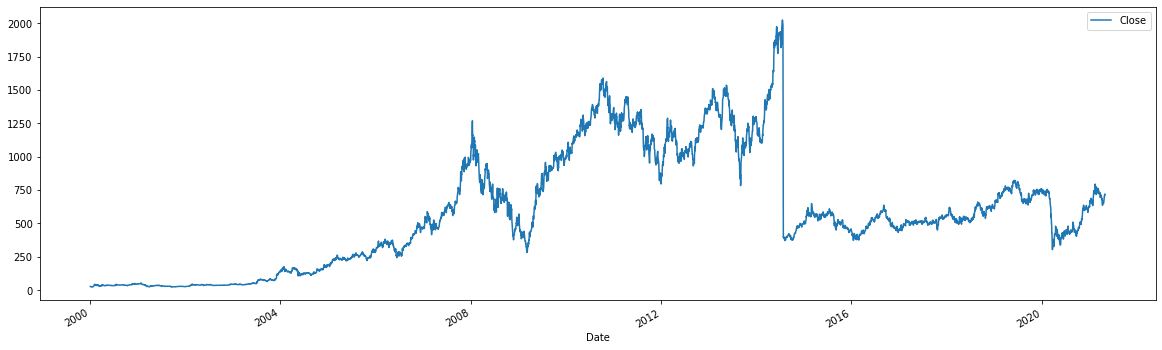

In [10]:
dataset['Close: 30 Day Mean']= dataset['Close'].rolling(window=30).mean
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(20,6))

<AxesSubplot:xlabel='Date'>

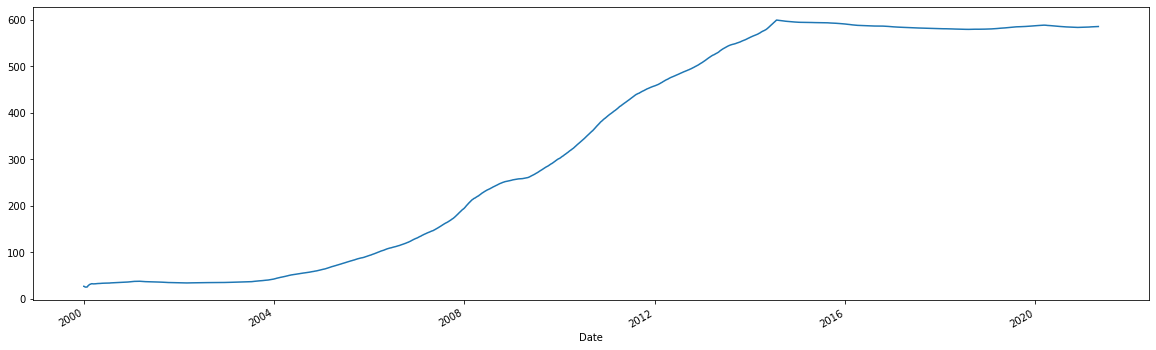

In [11]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(20,6))

In [40]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [41]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set=pd.DataFrame(training_set)

In [42]:
#Creating a Data Structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

TypeError: '(slice(0, 60, None), 0)' is an invalid key

In [33]:
#Section 2 - Buliding The RNN
#Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [34]:
#Initialising the RNN
regressor = Sequential()

In [35]:
#Adding the first LSTM Layer and some Dropout Regulations
regressor.add(LSTM(units = 50, return_sequence = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM Layer and some Dropout Regulations
regressor.add(LSTM(units = 50,return_Sequence = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM Layer and some Dropout Regulations
regressor.add(LSTM(units = 50, return_sequence = True))
regressor.add(Dropout(0.2))

#Ading a fourth LSTM Layer and some Dropout Regulations
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the Output Layer
regressor.add(Dense(units = 1))


AttributeError: 'list' object has no attribute 'shape'

In [36]:
#Compiling the RNN
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

KeyError: 'pop from an empty set'

In [ ]:
# Part 3 - Making the prediction and visualising the results
#Getting the real stock price of 2017
dateset_test = pd.read_csv('AXISBANK - AXISBANK.csv', index_col='date', parse_dates=True )

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head() 

In [ ]:
dataset_test.info()

In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

In [ ]:
#Getting the prediciton stock price 
datset_total = pd.concat(dataset['Open'], dataset_test['Open'], axis = 0)
inputs = datset_total[len(dataset_total) = len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[i],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.dataFrame(predicted_stock_price)
precited_stock_price.info()

In [ ]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = "Real Axis Bank Price"
         plt.plot(predicted_stock_price, color = 'blue', label = "Predicted Axis Bank Price"
                  plt.title("Axis Bank stock prediciton")
                  plt.xlabel("Time")
                  plt.ylabel("Axis Bank stock price")
                  plt.legend()
                  plt.show()